In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

In [3]:

img_camisa = cv2.imread("images/camisa-roja.jpg")
width, height = 250,250

def mi_funcion(val):
    return

cv2.namedWindow("Trackbars")
cv2.resizeWindow("Trackbars",300,250)

# h, hm, s, sm, v, vm = (107, 255, 123, 255, 0, 255)
h, hm, s, sm, v, vm = (0, 170, 0, 166, 0, 255)

cv2.createTrackbar("Hue_Min","Trackbars",h,255,mi_funcion)
cv2.createTrackbar("Hue_Max","Trackbars",hm,255,mi_funcion)
cv2.createTrackbar("Sat_Min","Trackbars",s,255,mi_funcion)
cv2.createTrackbar("Sat_Max","Trackbars",sm,255,mi_funcion)
cv2.createTrackbar("Val_Min","Trackbars",v,255,mi_funcion)
cv2.createTrackbar("Val_Max","Trackbars",vm,255,mi_funcion)

# 107, 123, 0

while True:

    img = cv2.resize(img_camisa,(width,height))   # Widht, Heigth
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
   
    h_min = cv2.getTrackbarPos("Hue_Min","Trackbars")
    h_max = cv2.getTrackbarPos("Hue_Max","Trackbars")
    s_min = cv2.getTrackbarPos("Sat_Min","Trackbars")
    s_max = cv2.getTrackbarPos("Sat_Max","Trackbars")
    v_min = cv2.getTrackbarPos("Val_Min","Trackbars")
    v_max = cv2.getTrackbarPos("Val_Max","Trackbars")
    
    # print((h_min,h_max,s_min,s_max,v_min,v_max))
    
    lw = np.array([h_min,s_min,v_min])
    up = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lw,up)

    mask = mask[...,np.newaxis]
    mask = np.concatenate([mask,mask,mask],axis=2)

    mask_gray = np.copy(mask)
    mask_not = cv2.bitwise_not(mask) 
    result = cv2.bitwise_and(mask_not,img)
    color_change = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    mask_color = cv2.bitwise_and(mask_not, color_change)
    mask_quit = cv2.bitwise_and(img, mask_gray)
    result_color = cv2.bitwise_or(mask_quit, mask_color)

    imgStack = stackImages(1.0,[[img, result_color, mask_quit, mask_gray, mask_not],[imgHSV, color_change, result, mask_color, mask]]) #np.hstack([img,imgHSV,mask2,result])
    
    cv2.imshow("Resultados",imgStack)
    cv2.imwrite('images/result.jpg', imgStack)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

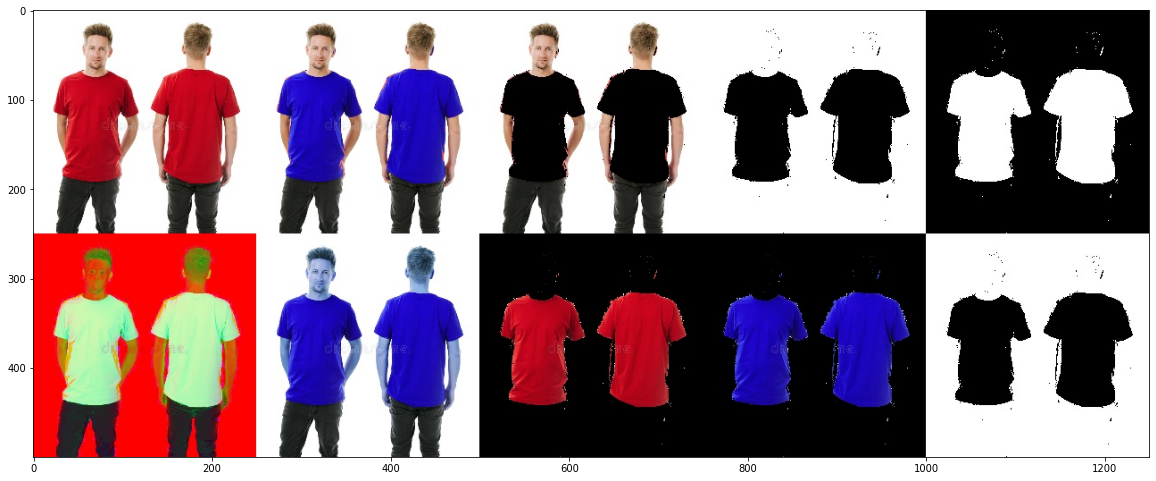

In [12]:
img = cv2.imread('images/result.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img)
# plt.imshow(img)

In [10]:
img = cv2.imread('images/result.jpg')
cv2.imshow('Image', img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 